<a href="https://colab.research.google.com/github/aayushrai/NLP/blob/master/Tensorflow/11_Next_word_prediction2(Large_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Embedding
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.optimizers import Adam

In [29]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-07-04 19:49:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-07-04 19:49:42 (103 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [30]:
data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.split("\n")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [32]:
input_seqs = []
max_len = 0
for line in corpus:
  seq = tokenizer.texts_to_sequences([line])[0]
  if max_len < len(seq):
    max_len = len(seq)
  for i in range(2,len(seq)):
    input_seqs.append(seq[:i])
print(max_len)
input_seqs = np.array(pad_sequences(input_seqs,maxlen=max_len,padding="pre"))
xs,labels = input_seqs[:,:-1],input_seqs[:,-1]
ys = tf.keras.utils.to_categorical(labels)

16


In [33]:
print(len(ys[0]))

2690


In [36]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
324/324 [==============================] - 4s 11ms/step - loss: 6.4099 - accuracy: 0.0836
Epoch 2/100
324/324 [==============================] - 4s 11ms/step - loss: 5.5982 - accuracy: 0.1217
Epoch 3/100
324/324 [==============================] - 4s 11ms/step - loss: 4.8672 - accuracy: 0.1684
Epoch 4/100
324/324 [==============================] - 3s 11ms/step - loss: 4.0483 - accuracy: 0.2327
Epoch 5/100
324/324 [==============================] - 4s 11ms/step - loss: 3.2449 - accuracy: 0.3256
Epoch 6/100
324/324 [==============================] - 4s 11ms/step - loss: 2.5738 - accuracy: 0.4287
Epoch 7/100
324/324 [==============================] - 3s 11ms/step - loss: 2.0852 - accuracy: 0.5187
Epoch 8/100
324/324 [==============================] - 3s 11ms/step - loss: 1.7111 - accuracy: 0.5937
Epoch 9/100
324/324 [==============================] - 4s 11ms/step - loss: 1.4613 - accuracy: 0.6521
Epoch 10/100
324/324 [==============================] - 3s 11ms/step - loss: 1.248

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

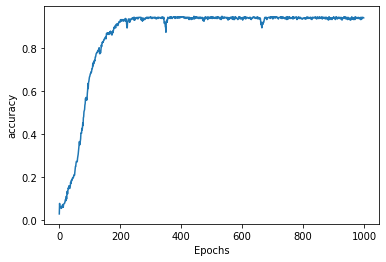

In [19]:
plot_graphs(history, 'accuracy')

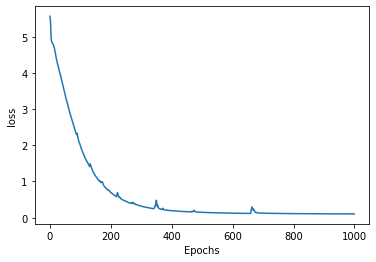

In [20]:
plot_graphs(history, 'loss')

In [37]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this beauty and youth tis with their blood said years is rogue grow please wont slight you with tough rings and banish i i lovd neer spoke far leaning look so bright and the old i and my i did four turned ill sit to the grass she come with the cliffs of the old pianos setting and gone and the shure with all its flavours along with all its only johnny youre only joking like manys the time was chanting and immortal shalt sleep in a black velvet and the hail blow i can some daughter of the shure that
